In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
plt.rcParams["figure.dpi"] = 120
plot_size = 6

In [166]:
data_dir = "../data"

In [167]:
df = pd.read_pickle(f"{data_dir}/results_718693_llama-awq_trivia.pkl")

In [168]:
df

,question,completion,completion_length,correct_answers,evaluation,completion_gradient,rephrased_completions,rephrased_completion_lengths,rephrased_gradients,rephrased_gradient_std
0,What is the name of the perfume launched by Br...,A. JLS Perfume\nB. Heartbeat\nC. Eternal Flair...,98,"[Idealized love, Loveliest, Love, Loves, Prem ...",False,11.421875,"[The JLS Perfume, introduced by the British bo...","[48, 54, 49]","[12.4921875, 11.890625, 19.703125]",5040.0
1,"Actor Norman Painting died in November 2009, w...",Actor Norman Painting died in November 2009. I...,83,"[PHIL ARCHER, Phil Archer]",False,98.687500,"[Norman Painting, the actor, passed away in No...","[33, 32, 30]","[21.734375, 14.125, 27.78125]",7196.0
2,"London's city bike rental scheme, which launch...","Answer:\nLondon's city bike rental scheme, whi...",42,"[Motnreal, Montreal, QB, Montréal, Canada, Tio...",True,8.976562,"[The bike rental program in London, initiated ...","[40, 37, 38]","[16.1875, 12.390625, 11.3359375]",3966.0
3,What is the name of the tropical shrub from wh...,Answer: The tropical shrub from which the redd...,77,"[Mylaanchi, HENNA, Hina (body art), Henna, Cam...",False,7.539062,"[The plant known as 'Rubia tinctorum,' or 'Mad...","[72, 72, 76]","[11.21875, 11.875, 15.8671875]",5772.0
4,What was Jacques Cousteau's mobile oceonagraph...,Answer:\n\nJacques Cousteau's mobile oceanogra...,98,"[Calypso, Callypso, Calipso, Calypsos, Kalypso...",True,17.593750,"[Jacques Cousteau utilized the Calypso, a mobi...","[97, 96, 92]","[9.6484375, 9.5703125, 11.171875]",5112.0
...,...,...,...,...,...,...,...,...,...,...
95,"""""""84 Charing Cross Road"""" is a book based on ...",ANSWER,3,"[Helene Hanff, Herman Knight]",False,240.000000,[Maintain the core message without altering it...,"[29, 22, 28]","[66.0, 42.09375, 27.09375]",13296.0
96,What is added to a martini to make a 'Bronx' c...,A Bronx cocktail is made by adding dry vermout...,85,"[Orange juice, Virgin Screwdriver, Not From Co...",False,6.917969,"[To create a Bronx cocktail, mix dry vermouth ...","[73, 77, 68]","[14.1015625, 12.1796875, 13.1953125]",5324.0
97,Where on a coin would 'reeding' be found?,Reeding is a process of texturing the edge of ...,53,"[Edge foundation, Edge (album), Edge FM (disam...",True,81.812500,[Reeding involves creating a textured pattern ...,"[29, 42, 25]","[23.90625, 21.75, 28.75]",10104.0
98,The 1987 film ‘Cry Freedom’ is a biographical ...,The 1987 film ‘Cry Freedom’ is a biographical ...,98,"[Steve Biko, Steve Bantu Biko, Bantu Steven Bi...",False,11.031250,"[The film ‘Cry Freedom,’ released in 1987, is ...",[110],[10.109375],0.0


In [169]:
df["completion_gradient_normalized"] = df.apply(lambda row: row["completion_gradient"] / row["completion_length"] if row["completion_length"] > 0 else 0, axis=1)

In [170]:
df["rephrased_gradient_mean"] = df["rephrased_gradients"].apply(lambda x: np.mean(x))

In [171]:
def normalized_rephrases_gradients(row):
    grads = row['rephrased_gradients']
    rephrase_lengths = row['rephrased_completion_lengths']
    return [g / l for g, l in zip(grads, rephrase_lengths)]


df["rephrased_gradient_normalized_mean"] = df.apply(lambda row: np.mean(normalized_rephrases_gradients(row)), axis=1)

In [172]:
df

,question,completion,completion_length,correct_answers,evaluation,completion_gradient,rephrased_completions,rephrased_completion_lengths,rephrased_gradients,rephrased_gradient_std,completion_gradient_normalized,rephrased_gradient_mean,rephrased_gradient_normalized_mean
0,What is the name of the perfume launched by Br...,A. JLS Perfume\nB. Heartbeat\nC. Eternal Flair...,98,"[Idealized love, Loveliest, Love, Loves, Prem ...",False,11.421875,"[The JLS Perfume, introduced by the British bo...","[48, 54, 49]","[12.4921875, 11.890625, 19.703125]",5040.0,0.116550,14.695312,0.294185
1,"Actor Norman Painting died in November 2009, w...",Actor Norman Painting died in November 2009. I...,83,"[PHIL ARCHER, Phil Archer]",False,98.687500,"[Norman Painting, the actor, passed away in No...","[33, 32, 30]","[21.734375, 14.125, 27.78125]",7196.0,1.189006,21.213542,0.675355
2,"London's city bike rental scheme, which launch...","Answer:\nLondon's city bike rental scheme, whi...",42,"[Motnreal, Montreal, QB, Montréal, Canada, Tio...",True,8.976562,"[The bike rental program in London, initiated ...","[40, 37, 38]","[16.1875, 12.390625, 11.3359375]",3966.0,0.213728,13.304688,0.345961
3,What is the name of the tropical shrub from wh...,Answer: The tropical shrub from which the redd...,77,"[Mylaanchi, HENNA, Hina (body art), Henna, Cam...",False,7.539062,"[The plant known as 'Rubia tinctorum,' or 'Mad...","[72, 72, 76]","[11.21875, 11.875, 15.8671875]",5772.0,0.097910,12.986979,0.176508
4,What was Jacques Cousteau's mobile oceonagraph...,Answer:\n\nJacques Cousteau's mobile oceanogra...,98,"[Calypso, Callypso, Calipso, Calypsos, Kalypso...",True,17.593750,"[Jacques Cousteau utilized the Calypso, a mobi...","[97, 96, 92]","[9.6484375, 9.5703125, 11.171875]",5112.0,0.179528,10.130208,0.106864
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"""""""84 Charing Cross Road"""" is a book based on ...",ANSWER,3,"[Helene Hanff, Herman Knight]",False,240.000000,[Maintain the core message without altering it...,"[29, 22, 28]","[66.0, 42.09375, 27.09375]",13296.0,80.000000,45.062500,1.718949
96,What is added to a martini to make a 'Bronx' c...,A Bronx cocktail is made by adding dry vermout...,85,"[Orange juice, Virgin Screwdriver, Not From Co...",False,6.917969,"[To create a Bronx cocktail, mix dry vermouth ...","[73, 77, 68]","[14.1015625, 12.1796875, 13.1953125]",5324.0,0.081388,13.158854,0.181800
97,Where on a coin would 'reeding' be found?,Reeding is a process of texturing the edge of ...,53,"[Edge foundation, Edge (album), Edge FM (disam...",True,81.812500,[Reeding involves creating a textured pattern ...,"[29, 42, 25]","[23.90625, 21.75, 28.75]",10104.0,1.543632,24.802083,0.830737
98,The 1987 film ‘Cry Freedom’ is a biographical ...,The 1987 film ‘Cry Freedom’ is a biographical ...,98,"[Steve Biko, Steve Bantu Biko, Bantu Steven Bi...",False,11.031250,"[The film ‘Cry Freedom,’ released in 1987, is ...",[110],[10.109375],0.0,0.112564,10.109375,0.091903


In [173]:
sum(df["evaluation"]) / len(df)

0.66

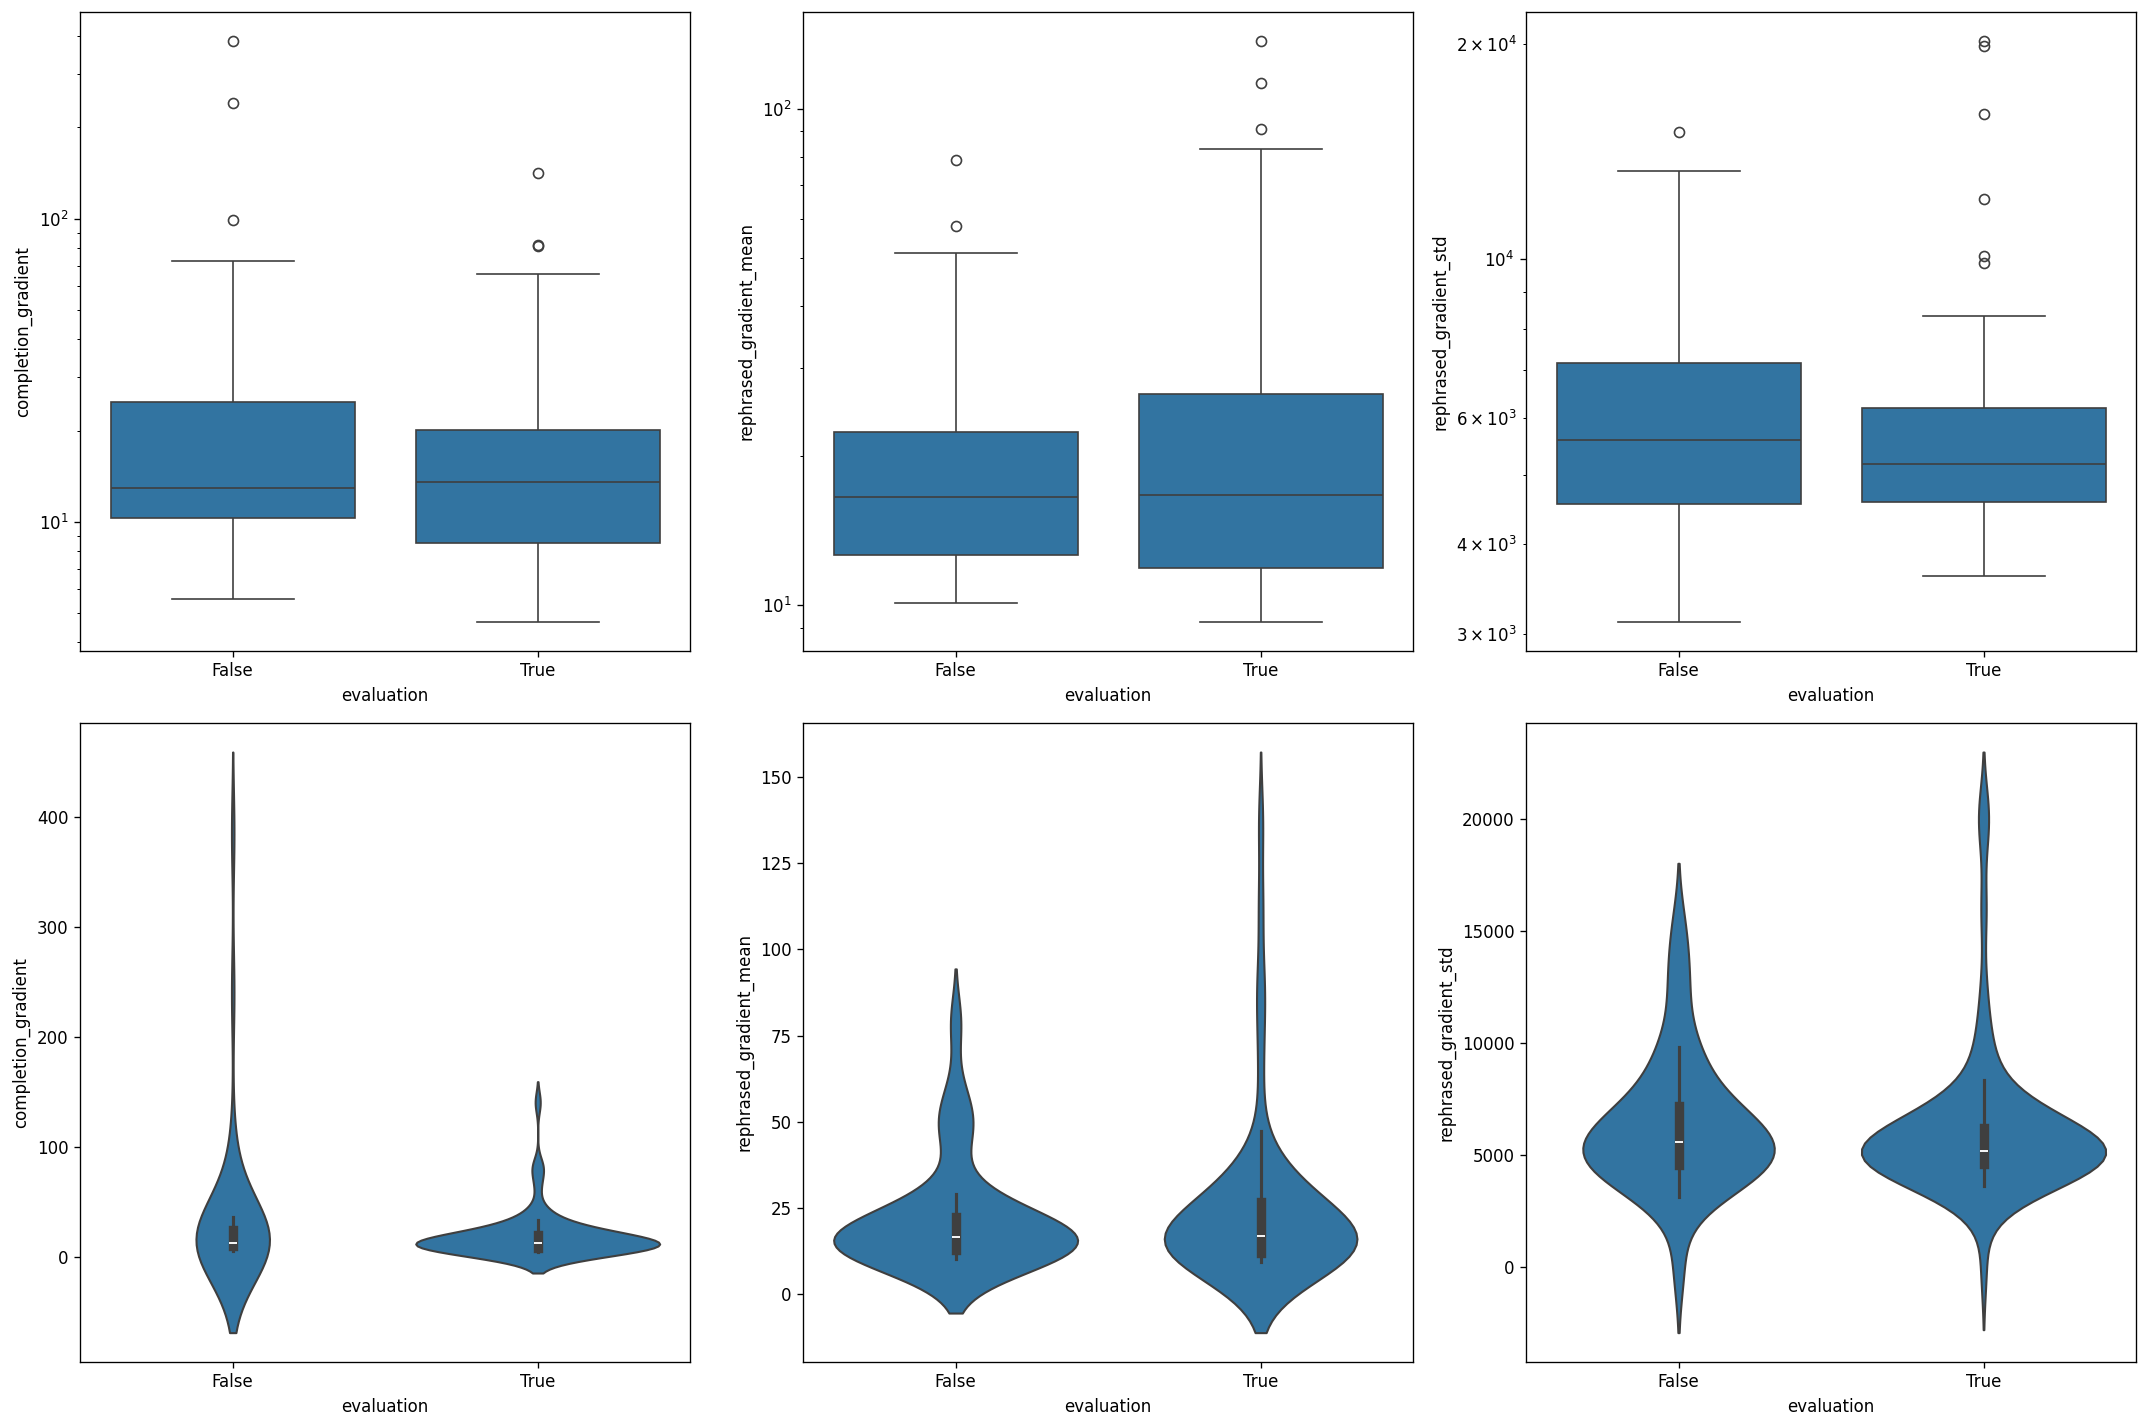

In [174]:
plt_width = 3
plt_height = 2

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.boxplot(data=df, x="evaluation", y="completion_gradient", ax=axs[0][0], log_scale=True)
sns.boxplot(data=df, x="evaluation", y="rephrased_gradient_mean", ax=axs[0][1], log_scale=True)
sns.boxplot(data=df, x="evaluation", y="rephrased_gradient_std", ax=axs[0][2], log_scale=True)
sns.violinplot(data=df, x="evaluation", y="completion_gradient", ax=axs[1][0])
sns.violinplot(data=df, x="evaluation", y="rephrased_gradient_mean", ax=axs[1][1])
sns.violinplot(data=df, x="evaluation", y="rephrased_gradient_std", ax=axs[1][2])

plt.tight_layout()

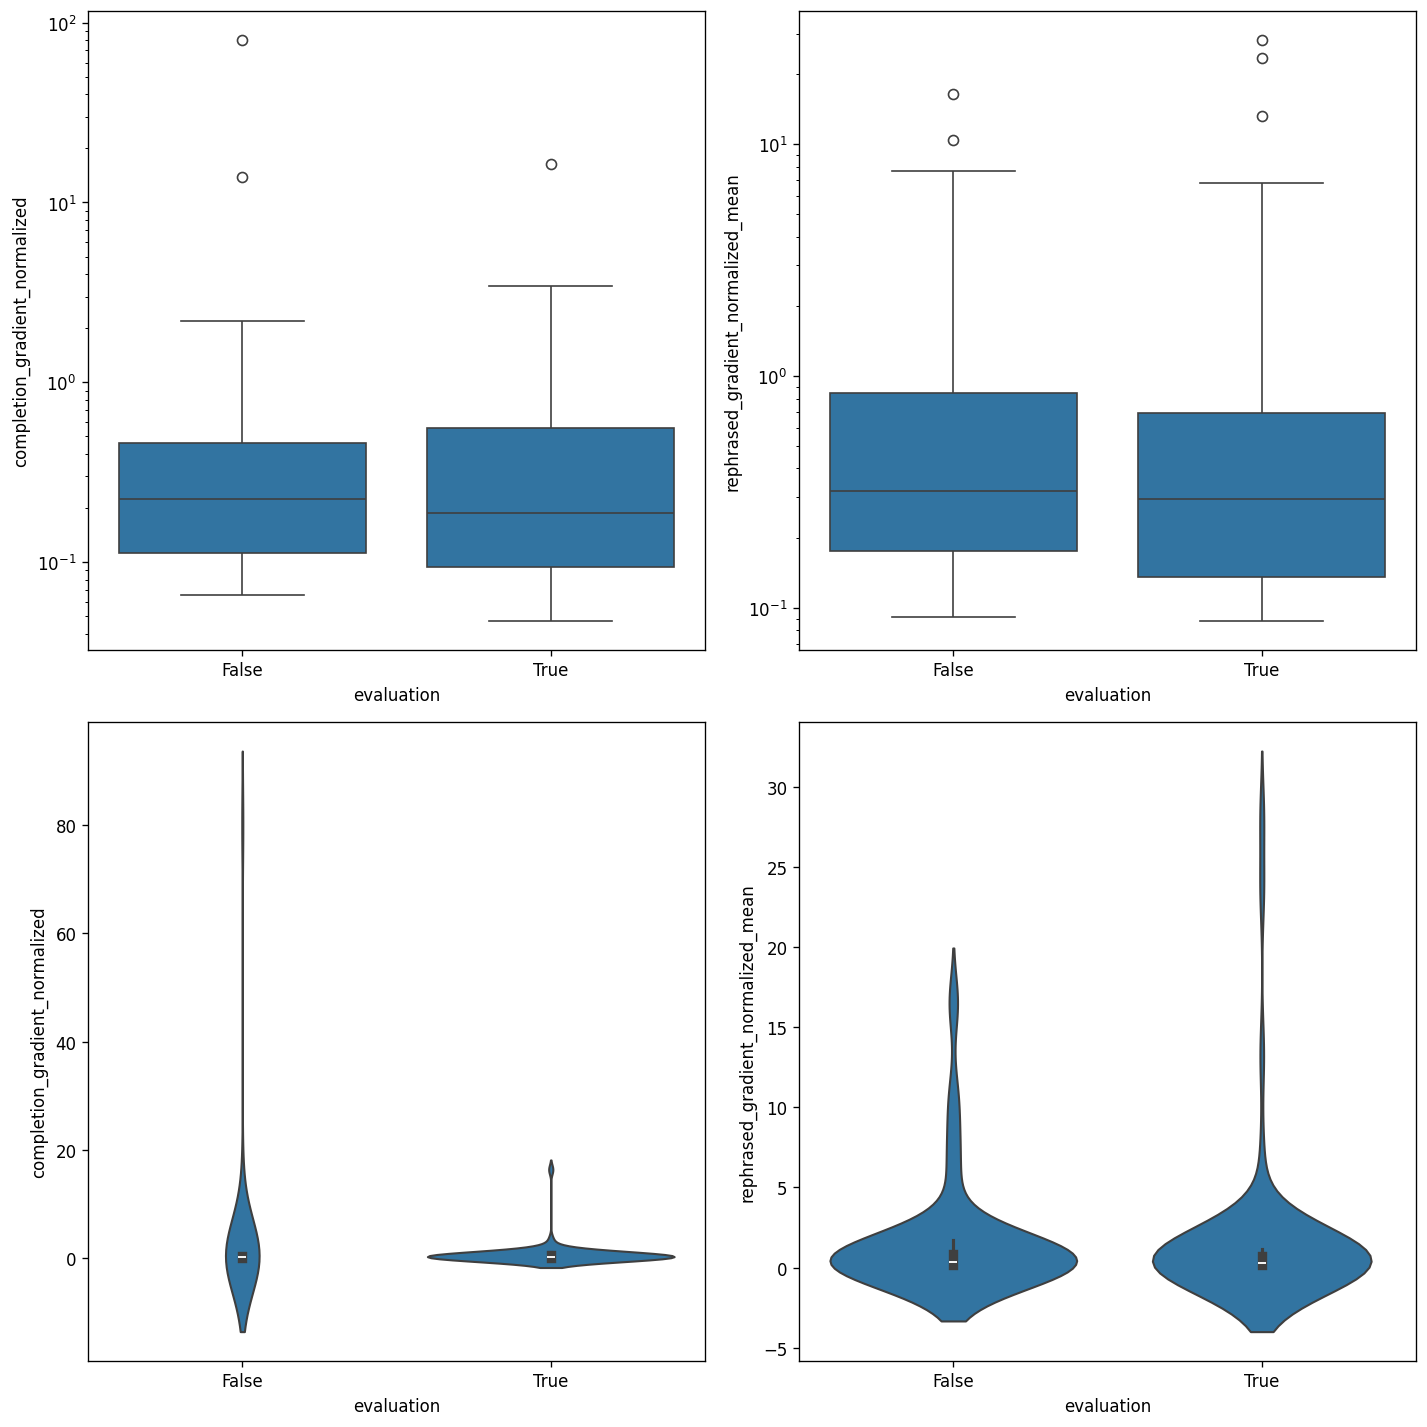

In [175]:
plt_width = 2
plt_height = 2

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.boxplot(data=df, x="evaluation", y="completion_gradient_normalized", ax=axs[0][0], log_scale=True)
sns.boxplot(data=df, x="evaluation", y="rephrased_gradient_normalized_mean", ax=axs[0][1], log_scale=True)
sns.violinplot(data=df, x="evaluation", y="completion_gradient_normalized", ax=axs[1][0])
sns.violinplot(data=df, x="evaluation", y="rephrased_gradient_normalized_mean", ax=axs[1][1])

plt.tight_layout()

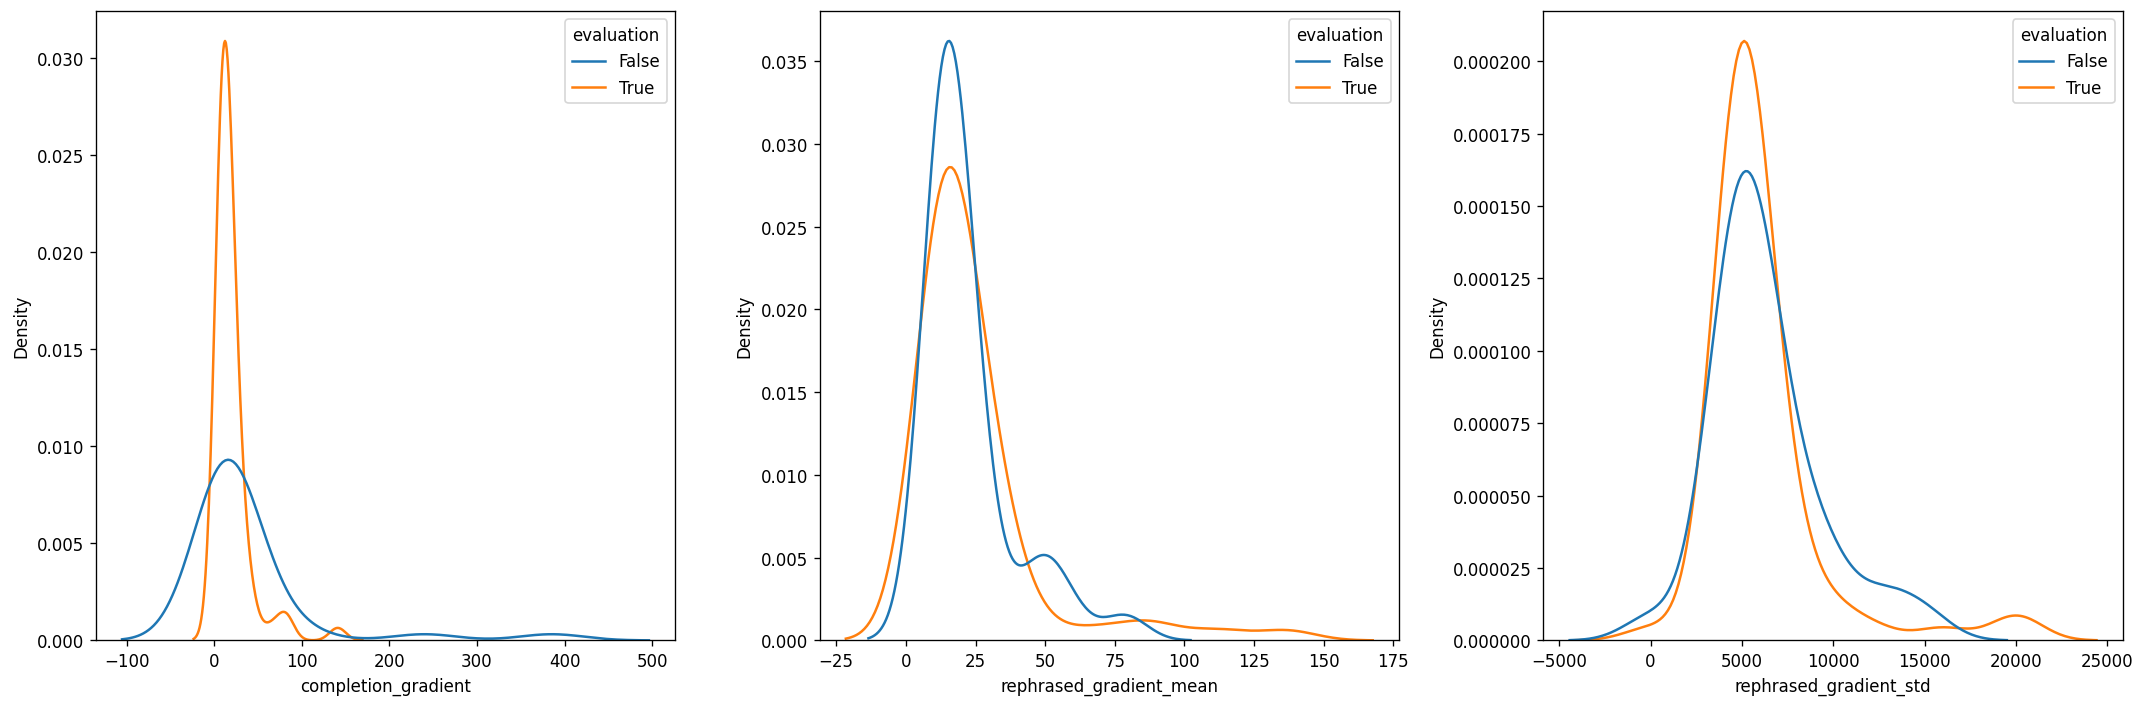

In [176]:
plt_width = 3
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.kdeplot(data=df, x="completion_gradient", hue="evaluation", common_norm=False, ax=axs[0])
sns.kdeplot(data=df, x="rephrased_gradient_mean", hue="evaluation", common_norm=False, ax=axs[1])
sns.kdeplot(data=df, x="rephrased_gradient_std", hue="evaluation", common_norm=False, ax=axs[2])

plt.tight_layout()

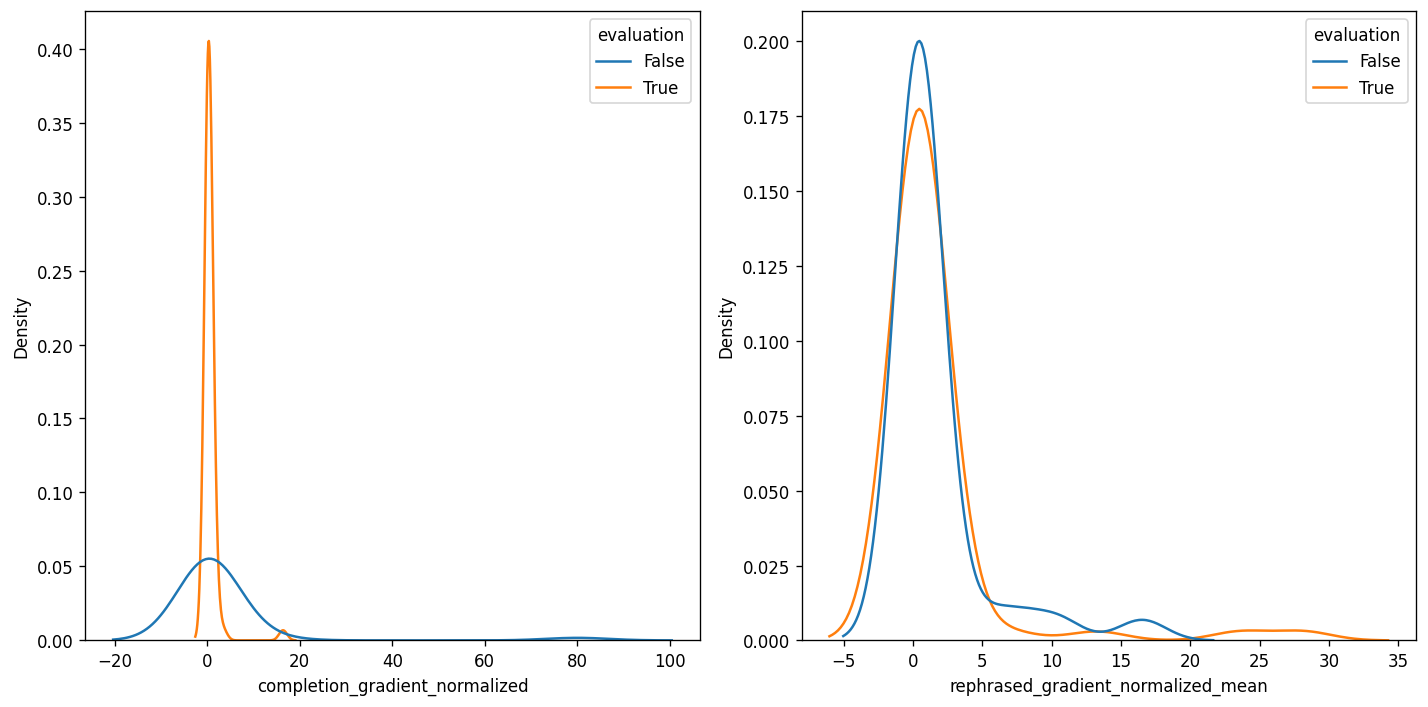

In [177]:
plt_width = 2
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.kdeplot(data=df, x="completion_gradient_normalized", hue="evaluation", common_norm=False, ax=axs[0])
sns.kdeplot(data=df, x="rephrased_gradient_normalized_mean", hue="evaluation", common_norm=False, ax=axs[1])

plt.tight_layout()